In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


Import necessary files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading Your Csv file

In [ ]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


SkinThickness and Insulin can't be 0.
That means nan is replaced by 0 here.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df=data.iloc[:,:-1]
df=df.replace(0,np.nan)

In [ ]:
data.duplicated().any()

False

In [ ]:
data.iloc[:,:-1]=df
data.dropna(inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.851190,122.279762,70.244048,28.663690,155.348214,32.297321,0.518702,31.836310,0.330357
std,3.148352,30.784649,12.363401,10.249863,118.777281,6.368558,0.327689,10.458446,0.471043
min,1.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,27.800000,0.268000,24.000000,0.000000
50%,3.000000,119.000000,70.000000,28.500000,125.500000,32.750000,0.446500,28.000000,0.000000
75%,6.000000,144.000000,78.000000,36.000000,190.000000,36.250000,0.688250,38.000000,1.000000
max,17.000000,197.000000,110.000000,52.000000,846.000000,57.300000,2.329000,81.000000,1.000000


There is variation in mean of all the features 


In [ ]:
#to minimize variation in our mean or simply scaling our data using normalization (Scaling b/w 0-1)
from sklearn.preprocessing import MinMaxScaler
X=data.iloc[:,:-1]
norm=MinMaxScaler().fit(X)
ds=norm.transform(X)
ds=pd.DataFrame(ds)
ds.columns=X.columns
ds.describe()
'''
#standardization
from sklearn.preprocessing import StandardScaler
ds=data.iloc[:,:-1]
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in cols:
  scale=StandardScaler().fit(ds[[i]]);
  ds[i]=scale.transform(ds[[i]])
ds.describe()
'''

"\n#standardization\nfrom sklearn.preprocessing import StandardScaler\nds=data.iloc[:,:-1]\ncols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']\nfor i in cols:\n  scale=StandardScaler().fit(ds[[i]]);\n  ds[i]=scale.transform(ds[[i]])\nds.describe()\n"

Now our data is scaled

<Figure size 432x288 with 0 Axes>

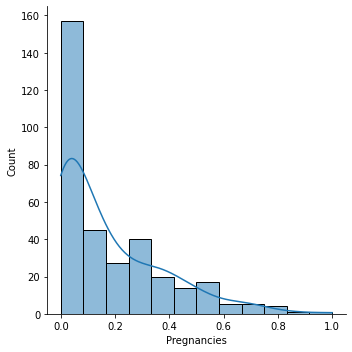

<Figure size 432x288 with 0 Axes>

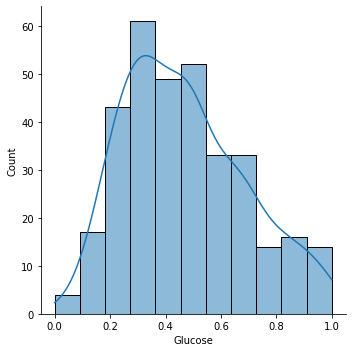

<Figure size 432x288 with 0 Axes>

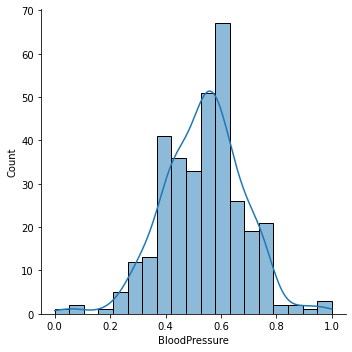

<Figure size 432x288 with 0 Axes>

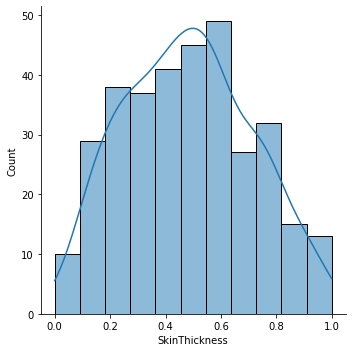

<Figure size 432x288 with 0 Axes>

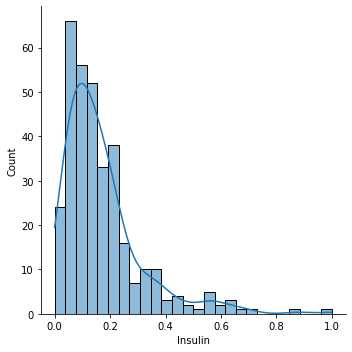

<Figure size 432x288 with 0 Axes>

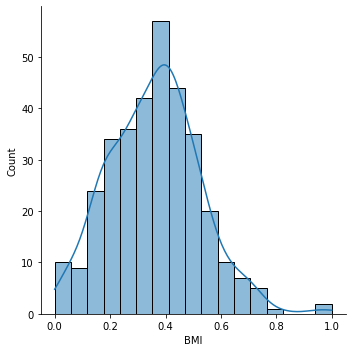

<Figure size 432x288 with 0 Axes>

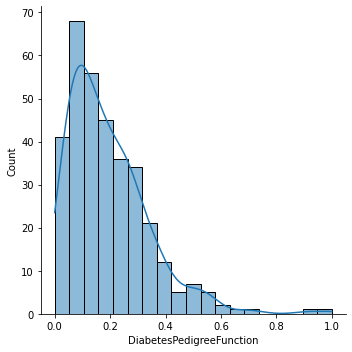

<Figure size 432x288 with 0 Axes>

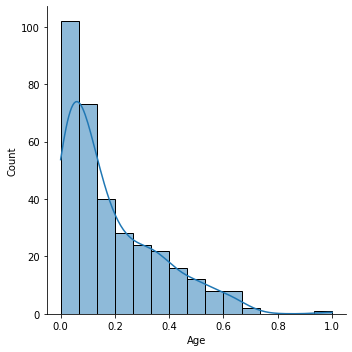

In [ ]:
for col in ds.columns:
  plt.figure()
  sns.displot(ds[col],kde=True)


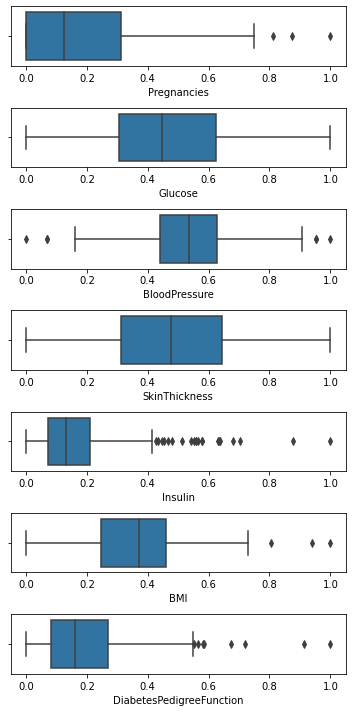

In [ ]:
fig,axs=plt.subplots(nrows=7,figsize=(5,10))
for i in range(0,7):
  sns.boxplot(x=ds.iloc[:,i],ax=axs[i]);
plt.tight_layout()

There are outlier present in our data we can deal with it using IQR or some other methods...
But right now we are ignoring these outlier as there can be some exceptional cases. 

In [ ]:
ds.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.250519,0.298336,0.171517,0.101397,0.118681,0.025755,0.675202
Glucose,0.250519,1.000000,0.237707,0.204054,0.587348,0.199681,0.117859,0.375484
BloodPressure,0.298336,0.237707,1.000000,0.208907,0.100835,0.266723,0.016021,0.343854
SkinThickness,0.171517,0.204054,0.208907,1.000000,0.202180,0.639901,0.132766,0.205159
Insulin,0.101397,0.587348,0.100835,0.202180,1.000000,0.246661,0.179846,0.242045
BMI,0.118681,0.199681,0.266723,0.639901,0.246661,1.000000,0.126696,0.128185
DiabetesPedigreeFunction,0.025755,0.117859,0.016021,0.132766,0.179846,0.126696,1.000000,0.074231
Age,0.675202,0.375484,0.343854,0.205159,0.242045,0.128185,0.074231,1.000000


We dont see as such multicollineraity here so no need to remove any column

In [ ]:
#Spliting our data into train and test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
X=np.asarray(ds);
Y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True);
Lr_model=LogisticRegression();
Lr_model=Lr_model.fit(x_train,y_train)


In [ ]:
from sklearn.metrics import classification_report;
y_pred=Lr_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        69
           1       0.73      0.34      0.47        32

    accuracy                           0.75       101
   macro avg       0.74      0.64      0.65       101
weighted avg       0.75      0.75      0.72       101



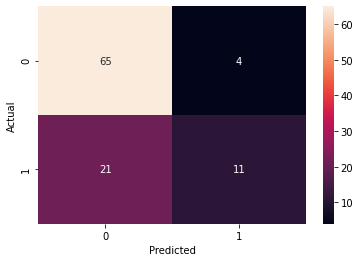

In [ ]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)


Now applying svm

In [ ]:
X_var=np.asarray(ds);
Y_var=np.asarray(data.Outcome)
x_train,x_test,y_train,y_test=train_test_split(X_var,Y_var,test_size=0.3,shuffle=True);


In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        71
           1       0.76      0.53      0.63        30

    accuracy                           0.81       101
   macro avg       0.79      0.73      0.75       101
weighted avg       0.81      0.81      0.80       101



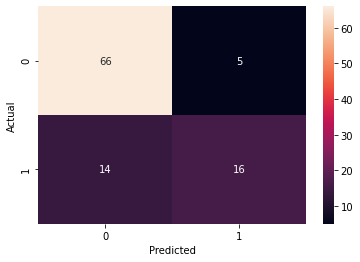

In [ ]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

Both the algo are performing quite good..
But SVM is giving better performance (F1 of SVM > F1 of LR).
It could be because SVM can handle outliers well.
